In [33]:
# Let's import pandas and some other basic packages we will use 
from __future__ import division
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<div class="alert alert-block alert-warning">
<b>Exercise 0:</b> Create a new folder and notebook called <b>Intro-Data-Analysis-Pandas-Exercises</b> where you will perform all the exercises below. Make sure to copy any code you need from this notebook to that one. You will use that folder to create a new GitHub repo with the code, html, and slides as usual.
</div>

Done.

<div class="alert alert-block alert-warning">
<b>Exercise 1:</b> Create a new dataframe <code>pop</code> with population data downloaded from <a href="https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)">Wikipedia</a>. Make sure to clean the data so it can be used further.
</div>

In [34]:
# Import display options for showing websites
from IPython.display import IFrame
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
IFrame(url, width=800, height=400)

In [35]:
pop = pd.read_html(url, encoding='utf-8')[0]
pop

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
...,...,...,...,...,...,...
229,Falkland Islands (United Kingdom),Americas,South America,3234,3377,+4.42%
230,Niue,Oceania,Polynesia,1620,1615,−0.31%
231,Tokelau (New Zealand),Oceania,Polynesia,1319,1340,+1.59%
232,Vatican City[z],Europe,Southern Europe,801,799,−0.25%


In [36]:
pop.columns

Index(['Country / Area', 'UN continentalregion[4]',
       'UN statisticalsubregion[4]', 'Population(1 July 2018)',
       'Population(1 July 2019)', 'Change'],
      dtype='object')

In [37]:
pop.columns = ['Country / Area', 'UN Continental Region', 'UN Statistical Subregion', 'Population (1 July 2018)', 
               'Population (1 July 2019)', 'Change']
pop

,Country / Area,UN Continental Region,UN Statistical Subregion,Population (1 July 2018),Population (1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
...,...,...,...,...,...,...
229,Falkland Islands (United Kingdom),Americas,South America,3234,3377,+4.42%
230,Niue,Oceania,Polynesia,1620,1615,−0.31%
231,Tokelau (New Zealand),Oceania,Polynesia,1319,1340,+1.59%
232,Vatican City[z],Europe,Southern Europe,801,799,−0.25%


In [38]:
pop['country_name'] = pop['Country / Area']
pop.loc[pop.country_name.str.find('[')!=-1, 'country_name'] = pop.loc[pop.country_name.str.find('[')!=-1, 'country_name'].apply(lambda x: x[:x.strip().find('[')])
pop['country_name']

0                                  China
1                                  India
2                          United States
3                              Indonesia
4                               Pakistan
                     ...                
229    Falkland Islands (United Kingdom)
230                                 Niue
231                Tokelau (New Zealand)
232                         Vatican City
233                                World
Name: country_name, Length: 234, dtype: object

In [39]:
pop.dtypes

Country / Area              object
UN Continental Region       object
UN Statistical Subregion    object
Population (1 July 2018)     int64
Population (1 July 2019)     int64
Change                      object
country_name                object
dtype: object

In [40]:
from IPython.display import IFrame
url1 = 'https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes'
IFrame(url1, width=800, height=400)

In [41]:
isocodes = pd.read_html(url1, encoding='utf-8')[0]
isocodes

ISO 3166[1]                              Unnamed: 1_level_0  \
         Country name[5]                          Official state name[6]   
0            Afghanistan             The Islamic Republic of Afghanistan   
1          Åland Islands                                           Åland   
2                Albania                         The Republic of Albania   
3                Algeria     The People's Democratic Republic of Algeria   
4         American Samoa                 The Territory of American Samoa   
..                   ...                                             ...   
266    Wallis and Futuna  The Territory of the Wallis and Futuna Islands   
267  Western Sahara [ai]            The Sahrawi Arab Democratic Republic   
268                Yemen                           The Republic of Yemen   
269               Zambia                          The Republic of Zambia   
270             Zimbabwe                        The Republic of Zimbabwe   

      Unnamed: 2_level_0                                      ISO 3166-1[2]  \
    Sovereignty[6][7][8]                                    Alpha-2 code[5]   
0        UN member state  .mw-parser-output .monospaced{font-family:mono...   
1                Finland                                                 AX   
2        UN member state                                                 AL   
3        UN member state                                                 DZ   
4          United States                                                 AS   
..                   ...                                                ...   
266               France                                                 WF   
267        Disputed [aj]                                                 EH   
268      UN member state                                                 YE   
269      UN member state                                                 ZM   
270      UN member state                                                 ZW   

                                                ISO 3166-2[3]  \
    Alpha-3 code[5] Numeric code[5] Subdivision code links[3]   
0               AFG             004             ISO 3166-2:AF   
1               ALA             248             ISO 3166-2:AX   
2               ALB             008             ISO 3166-2:AL   
3               DZA             012             ISO 3166-2:DZ   
4               ASM             016             ISO 3166-2:AS   
..              ...             ...                       ...   
266             WLF             876             ISO 3166-2:WF   
267             ESH             732             ISO 3166-2:EH   
268             YEM             887             ISO 3166-2:YE   
269             ZMB             894             ISO 3166-2:ZM   
270             ZWE             716             ISO 3166-2:ZW   

    Unnamed: 7_level_0  
     Internet ccTLD[9]  
0                  .af  
1                  .ax  
2                  .al  
3                  .dz  
4                  .as  
..                 ...  
266                .wf  
267               [ak]  
268                .ye  
269                .zm  
270                .zw  

[271 rows x 8 columns]

In [42]:
isocodes.columns

MultiIndex([(       'ISO 3166[1]',           'Country name[5]'),
            ('Unnamed: 1_level_0',    'Official state name[6]'),
            ('Unnamed: 2_level_0',      'Sovereignty[6][7][8]'),
            (     'ISO 3166-1[2]',           'Alpha-2 code[5]'),
            (     'ISO 3166-1[2]',           'Alpha-3 code[5]'),
            (     'ISO 3166-1[2]',           'Numeric code[5]'),
            (     'ISO 3166-2[3]', 'Subdivision code links[3]'),
            ('Unnamed: 7_level_0',         'Internet ccTLD[9]')],
           )

In [43]:
isocodes = isocodes.droplevel(0, axis=1)
isocodes.head()

,Country name[5],Official state name[6],Sovereignty[6][7][8],Alpha-2 code[5],Alpha-3 code[5],Numeric code[5],Subdivision code links[3],Internet ccTLD[9]
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,.mw-parser-output .monospaced{font-family:mono...,AFG,004,ISO 3166-2:AF,.af
1,Åland Islands,Åland,Finland,AX,ALA,248,ISO 3166-2:AX,.ax
2,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al
3,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz
4,American Samoa,The Territory of American Samoa,United States,AS,ASM,016,ISO 3166-2:AS,.as


In [44]:
mycols = isocodes.columns
mycols = [c[:c.find('[')] for c in mycols]
mycols

['Country name',
 'Official state name',
 'Sovereignty',
 'Alpha-2 code',
 'Alpha-3 code',
 'Numeric code',
 'Subdivision code links',
 'Internet ccTLD']

In [45]:
isocodes.columns = mycols
isocodes.head()

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,.mw-parser-output .monospaced{font-family:mono...,AFG,004,ISO 3166-2:AF,.af
1,Åland Islands,Åland,Finland,AX,ALA,248,ISO 3166-2:AX,.ax
2,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al
3,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz
4,American Samoa,The Territory of American Samoa,United States,AS,ASM,016,ISO 3166-2:AS,.as


In [46]:
isocodes['Alpha-2 code original'] = isocodes['Alpha-2 code']
isocodes['Alpha-2 code'] = isocodes['Subdivision code links'].apply(lambda x: x[x.find(':')+1:])
isocodes.head()

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD,Alpha-2 code original
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...
1,Åland Islands,Åland,Finland,AX,ALA,248,ISO 3166-2:AX,.ax,AX
2,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al,AL
3,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz,DZ
4,American Samoa,The Territory of American Samoa,United States,AS,ASM,016,ISO 3166-2:AS,.as,AS


<div class="alert alert-block alert-warning">
<b>Exercise 2:</b> Merge the <code>isocodes</code> and <code>pop</code> dataframes.
</div>

In [47]:
merged = isocodes.merge(pop, left_on='Country name', right_on='country_name')
merged

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD,Alpha-2 code original,Country / Area,UN Continental Region,UN Statistical Subregion,Population (1 July 2018),Population (1 July 2019),Change,country_name
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...,Afghanistan,Asia,Southern Asia,37171921,38041754,+2.34%,Afghanistan
1,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al,AL,Albania,Europe,Southern Europe,2882740,2880917,−0.06%,Albania
2,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz,DZ,Algeria,Africa,Northern Africa,42228408,43053054,+1.95%,Algeria
3,Andorra,The Principality of Andorra,UN member state,AD,AND,020,ISO 3166-2:AD,.ad,AD,Andorra,Europe,Southern Europe,77006,77142,+0.18%,Andorra
4,Angola,The Republic of Angola,UN member state,AO,AGO,024,ISO 3166-2:AO,.ao,AO,Angola,Africa,Middle Africa,30809787,31825295,+3.30%,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Uzbekistan,The Republic of Uzbekistan,UN member state,UZ,UZB,860,ISO 3166-2:UZ,.uz,UZ,Uzbekistan,Asia,Central Asia,32476244,32981716,+1.56%,Uzbekistan
151,Vanuatu,The Republic of Vanuatu,UN member state,VU,VUT,548,ISO 3166-2:VU,.vu,VU,Vanuatu,Oceania,Melanesia,292680,299882,+2.46%,Vanuatu
152,Yemen,The Republic of Yemen,UN member state,YE,YEM,887,ISO 3166-2:YE,.ye,YE,Yemen,Asia,Western Asia,28498683,29161922,+2.33%,Yemen
153,Zambia,The Republic of Zambia,UN member state,ZM,ZMB,894,ISO 3166-2:ZM,.zm,ZM,Zambia,Africa,Eastern Africa,17351708,17861030,+2.94%,Zambia


<div class="alert alert-block alert-warning">
<b>Exercise 3:</b> Merge the dataframes we have created so far to have a unique dataframe that has ISO codes, GDP per capita, and population data.
</div>

In [48]:
url2 = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'
IFrame(url2, width=800, height=400)

In [49]:
gdppc_wiki = pd.read_html(url2, encoding='utf-8')[1]
gdppc_wiki

Country/Territory UN Region IMF[5][6][7]       World Bank[8]  \
              Country/Territory UN Region     Estimate  Year      Estimate   
0                  Luxembourg *    Europe       141587  2022        134754   
1               Liechtenstein *    Europe            —     —             —   
2                   Singapore *      Asia       131426  2022        116487   
3                     Ireland *    Europe       131034  2022        106456   
4                      Monaco *    Europe            —     —             —   
..                          ...       ...          ...   ...           ...   
225                  DR Congo *    Africa         1328  2022          1219   
226                   Somalia *    Africa         1322  2022          1303   
227  Central African Republic *    Africa         1088  2022          1021   
228               South Sudan *    Africa          934  2022          1235   
229                   Burundi *    Africa          865  2022           793   

          CIA[9][10][11]        
     Year       Estimate  Year  
0    2021         110300  2020  
1       —         139100  2009  
2    2021          93400  2020  
3    2021          89700  2020  
4       —         115700  2015  
..    ...            ...   ...  
225  2021           1100  2020  
226  2021            800  2020  
227  2021            900  2020  
228  2015           1600  2017  
229  2021            700  2020  

[230 rows x 8 columns]

In [50]:
gdppc_wiki.columns = ['Country/Territory', 'UN Region', 'gdppc_IMF', 'year_IMF',
                      'gdppc_WB', 'year_WB', 'gdppc_CIA', 'year_CIA']
gdppc_wiki.head()

,Country/Territory,UN Region,gdppc_IMF,year_IMF,gdppc_WB,year_WB,gdppc_CIA,year_CIA
0,Luxembourg *,Europe,141587,2022,134754,2021,110300,2020
1,Liechtenstein *,Europe,—,—,—,—,139100,2009
2,Singapore *,Asia,131426,2022,116487,2021,93400,2020
3,Ireland *,Europe,131034,2022,106456,2021,89700,2020
4,Monaco *,Europe,—,—,—,—,115700,2015


In [51]:
gdppc_wiki['country_name'] = gdppc_wiki['Country/Territory'].str.replace('*', '', regex=True).str.strip()
gdppc_wiki.head()

,Country/Territory,UN Region,gdppc_IMF,year_IMF,gdppc_WB,year_WB,gdppc_CIA,year_CIA,country_name
0,Luxembourg *,Europe,141587,2022,134754,2021,110300,2020,Luxembourg
1,Liechtenstein *,Europe,—,—,—,—,139100,2009,Liechtenstein
2,Singapore *,Asia,131426,2022,116487,2021,93400,2020,Singapore
3,Ireland *,Europe,131034,2022,106456,2021,89700,2020,Ireland
4,Monaco *,Europe,—,—,—,—,115700,2015,Monaco


In [52]:
gdppc_wiki.dtypes

Country/Territory    object
UN Region            object
gdppc_IMF            object
year_IMF             object
gdppc_WB             object
year_WB              object
gdppc_CIA             int64
year_CIA             object
country_name         object
dtype: object

In [53]:
for c in gdppc_wiki.columns[2:-1]:
    if gdppc_wiki[c].dtype=='O':
        gdppc_wiki[c] = pd.to_numeric(gdppc_wiki[c].str.replace('—', 'nan'), errors='coerce')
        if c.startswith('year'):
            gdppc_wiki[c] = gdppc_wiki[c].astype('Int64')

In [54]:
gdppc_wiki.dtypes

Country/Territory     object
UN Region             object
gdppc_IMF            float64
year_IMF               Int64
gdppc_WB             float64
year_WB                Int64
gdppc_CIA              int64
year_CIA               Int64
country_name          object
dtype: object

In [55]:
merged1 = isocodes.merge(gdppc_wiki, left_on='Country name', right_on='country_name')
merged1

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD,Alpha-2 code original,Country/Territory,UN Region,gdppc_IMF,year_IMF,gdppc_WB,year_WB,gdppc_CIA,year_CIA,country_name
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...,Afghanistan *,Asia,2456.0,2020,2079.0,2020,2000,2020,Afghanistan
1,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al,AL,Albania *,Europe,17858.0,2022,15646.0,2021,13300,2020,Albania
2,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz,DZ,Algeria *,Africa,13324.0,2022,12038.0,2021,10700,2020,Algeria
3,American Samoa,The Territory of American Samoa,United States,AS,ASM,016,ISO 3166-2:AS,.as,AS,American Samoa *,Oceania,NaN,<NA>,NaN,<NA>,11200,2016,American Samoa
4,Andorra,The Principality of Andorra,UN member state,AD,AND,020,ISO 3166-2:AD,.ad,AD,Andorra *,Europe,65372.0,2022,NaN,<NA>,49900,2015,Andorra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Vanuatu,The Republic of Vanuatu,UN member state,VU,VUT,548,ISO 3166-2:VU,.vu,VU,Vanuatu *,Oceania,2858.0,2022,3105.0,2021,2800,2020,Vanuatu
172,Wallis and Futuna,The Territory of the Wallis and Futuna Islands,France,WF,WLF,876,ISO 3166-2:WF,.wf,WF,Wallis and Futuna *,Oceania,NaN,<NA>,NaN,<NA>,3800,2004,Wallis and Futuna
173,Yemen,The Republic of Yemen,UN member state,YE,YEM,887,ISO 3166-2:YE,.ye,YE,Yemen *,Asia,2136.0,2022,3689.0,2013,2500,2017,Yemen
174,Zambia,The Republic of Zambia,UN member state,ZM,ZMB,894,ISO 3166-2:ZM,.zm,ZM,Zambia *,Africa,3808.0,2022,3624.0,2021,3300,2020,Zambia


In [56]:
merged2 = merged1.merge(pop, left_on='Country name', right_on='country_name')
merged2

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD,Alpha-2 code original,Country/Territory,...,gdppc_CIA,year_CIA,country_name_x,Country / Area,UN Continental Region,UN Statistical Subregion,Population (1 July 2018),Population (1 July 2019),Change,country_name_y
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...,Afghanistan *,...,2000,2020,Afghanistan,Afghanistan,Asia,Southern Asia,37171921,38041754,+2.34%,Afghanistan
1,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al,AL,Albania *,...,13300,2020,Albania,Albania,Europe,Southern Europe,2882740,2880917,−0.06%,Albania
2,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz,DZ,Algeria *,...,10700,2020,Algeria,Algeria,Africa,Northern Africa,42228408,43053054,+1.95%,Algeria
3,Andorra,The Principality of Andorra,UN member state,AD,AND,020,ISO 3166-2:AD,.ad,AD,Andorra *,...,49900,2015,Andorra,Andorra,Europe,Southern Europe,77006,77142,+0.18%,Andorra
4,Angola,The Republic of Angola,UN member state,AO,AGO,024,ISO 3166-2:AO,.ao,AO,Angola *,...,6200,2020,Angola,Angola,Africa,Middle Africa,30809787,31825295,+3.30%,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Uzbekistan,The Republic of Uzbekistan,UN member state,UZ,UZB,860,ISO 3166-2:UZ,.uz,UZ,Uzbekistan *,...,7000,2020,Uzbekistan,Uzbekistan,Asia,Central Asia,32476244,32981716,+1.56%,Uzbekistan
151,Vanuatu,The Republic of Vanuatu,UN member state,VU,VUT,548,ISO 3166-2:VU,.vu,VU,Vanuatu *,...,2800,2020,Vanuatu,Vanuatu,Oceania,Melanesia,292680,299882,+2.46%,Vanuatu
152,Yemen,The Republic of Yemen,UN member state,YE,YEM,887,ISO 3166-2:YE,.ye,YE,Yemen *,...,2500,2017,Yemen,Yemen,Asia,Western Asia,28498683,29161922,+2.33%,Yemen
153,Zambia,The Republic of Zambia,UN member state,ZM,ZMB,894,ISO 3166-2:ZM,.zm,ZM,Zambia *,...,3300,2020,Zambia,Zambia,Africa,Eastern Africa,17351708,17861030,+2.94%,Zambia


<div class="alert alert-block alert-warning">
<b>Exercise 4:</b> Use the <code>os</code> package to create folders to export data and figures. 
Since you will be using the names of these folders a lot, save their names in variables called <code>path</code>, <code>pathout</code>, and <code>pathgraphs</code>, where <code>path = './data/'</code>, <code>pathout = './data/'</code>, and <code>pathgraphs = './graphs/'</code>
</div>

In [57]:
pathout = './data/'
if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

<div class="alert alert-block alert-warning">
    <b>Exercise 5:</b> Save the dataframe created in Exercise 3 as a <b>CSV, XLSX, and Stata</b> file into the <code>pathout</code> folder. Use a variable called <code>filename = 'Wiki_Data'</code> so you can use similar code to save all file types. Notice only the filetype will change.
</div>

In [68]:
filename = 'MergedData'
MergedDatacsv = os.path.join(pathout, filename+'.csv')
MergedDataxlsx = os.path.join(pathout, filename+'.xlsx')
MergedDatastata = os.path.join(pathout, filename+'.dta')
print(MergedDatacsv)
print(MergedDataxlsx)
print(MergedDatastata)

merged2.to_csv("./data/MergedData.csv")
merged2.to_csv("./data/MergedData.xlsx")
merged2.to_csv("./data/MergedData.dta")

./data/MergedData.csv
./data/MergedData.xlsx
./data/MergedData.dta


<div class="alert alert-block alert-warning">
<b>Exercise 6:</b> Create plots showing the relation between GDP per capita and Population. Create all 4 types of possible regression plots and save them as <b> PNG, PDF, and JPG</b> files. Make sure to save them in the folder you created for <b>graphs</b>
</div>

In [ ]:
#Linear-Linear Graph
fig, ax = plt.subplots(figsize=(10,6))
merged2.plot.scatter(x='gdppc_CIA', y='Population (1 July 2019)', ax=ax, label='GDP-IMF', c='r')
ax.set_xlabel('GDPPC - CIA')
ax.set_ylabel('Population (1 July 2019)')
plt.savefig(pathgraphs + './LinearLinearPlot.png')
plt.savefig(pathgraphs + './LinearLinearPlot.jpeg')
plt.savefig(pathgraphs + './LinearLinearPlot.pdf')

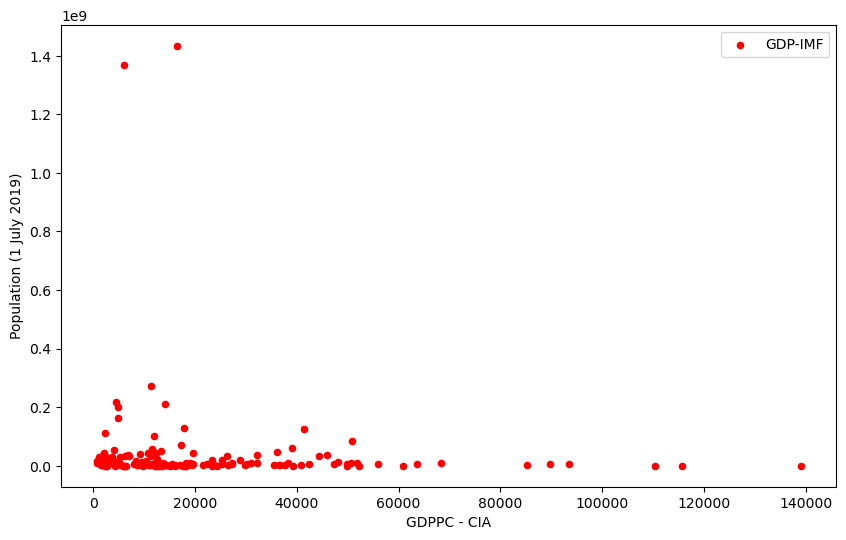

In [ ]:
#Log-Linear Graph
fig, ax = plt.subplots(figsize=(10,6))
merged2.plot.scatter(x='gdppc_CIA', y='Population (1 July 2019)', ax=ax, label='GDP-IMF', c='r')
ax.set_yscale('log')
ax.set_xlabel('GDPPC - CIA')
ax.set_ylabel('log(Population (1 July 2019))')
plt.savefig(pathgraphs + './LogLinearPlot.png')
plt.savefig(pathgraphs + './LogLinearPlot.jpeg')
plt.savefig(pathgraphs + './LogLinearPlot.pdf')

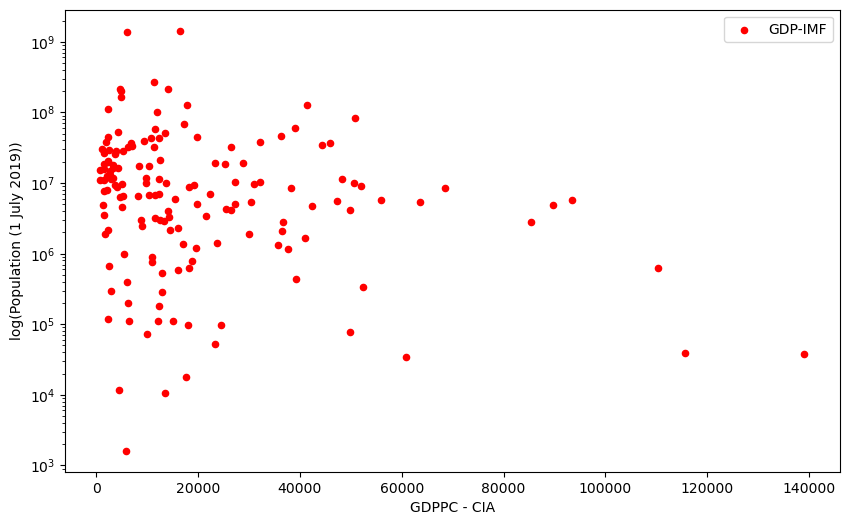

In [ ]:
#Log-Log Graph
fig, ax = plt.subplots(figsize=(10,6))
merged2.plot.scatter(x='gdppc_CIA', y='Population (1 July 2019)', ax=ax, label='GDP-IMF', c='r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('log(GDPPC - CIA)')
ax.set_ylabel('log(Population (1 July 2019))')
plt.savefig(pathgraphs + './LogLogPlot.png')
plt.savefig(pathgraphs + './LogLogPlot.jpeg')
plt.savefig(pathgraphs + './LogLogPlot.pdf')

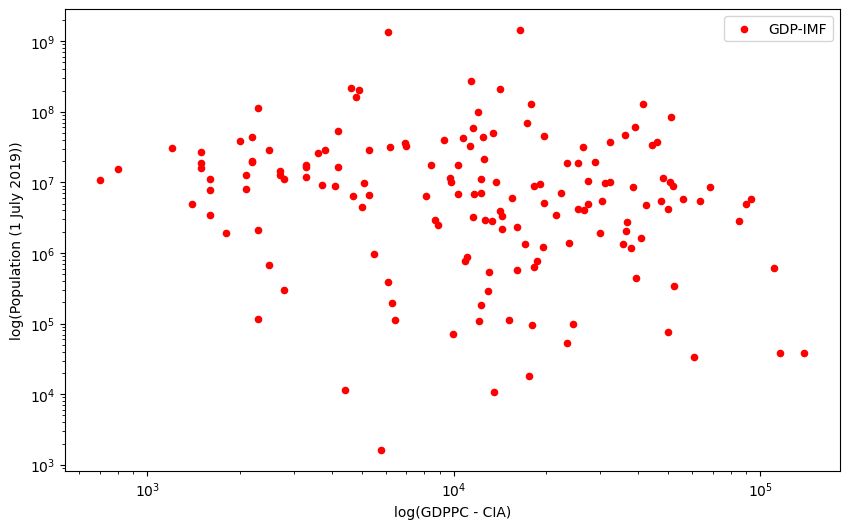

In [ ]:
#Linear-Log Graph
fig, ax = plt.subplots(figsize=(10,6))
merged2.plot.scatter(x='gdppc_CIA', y='Population (1 July 2019)', ax=ax, label='GDP-IMF', c='r')
ax.set_xscale('log')
ax.set_xlabel('log(GDPPC - CIA)')
ax.set_ylabel('Population (1 July 2019)')
plt.savefig(pathgraphs + './LinearLogPlot.png')
plt.savefig(pathgraphs + './LinearLogPlot.jpeg')
plt.savefig(pathgraphs + './LinearLogPlot.pdf')

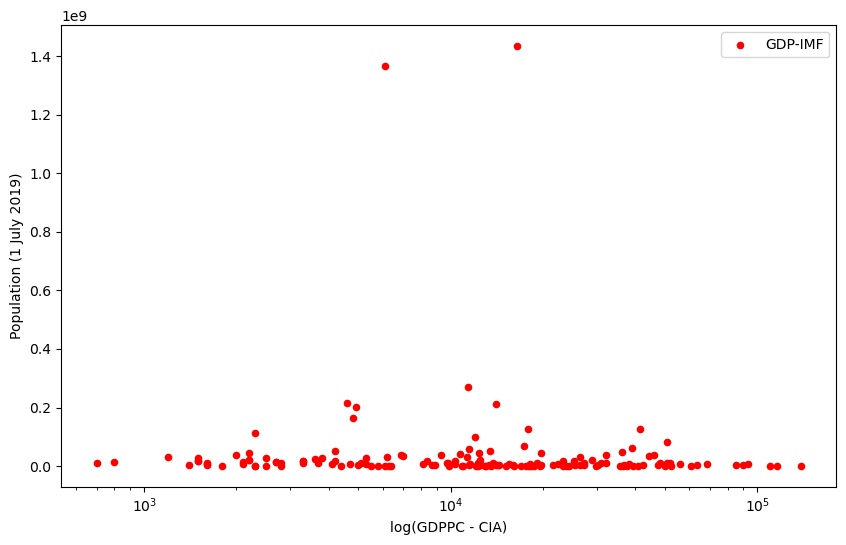

<div class="alert alert-block alert-warning">
<b>Exercise 7:</b> Create plots showing the relation between GDP per capita and Population Growth. Create all 4 types of possible regression plots and save them as <b> PNG, PDF, and JPG</b> files. Make sure to save them in the folder you created for <b>graphs</b>
</div>

Done in the exercise above.

<div class="alert alert-block alert-warning">
<b>Exercise 8:</b> Using the notebook create slides for presenting your work and results. Once you have your slides, create a new public repo, publish it, and make sure to create a READ.ME file that show links to the notebook, html, and slides. Also, create the gh-pages branch to have a working slides webpage.
</div>

Done.